## Loading required libraries

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("application_train.csv")

In [4]:
df.shape

(307511, 122)

In [5]:
all_col = df.columns

In [6]:
#from pandas_profiling import ProfileReport

In [7]:
df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [8]:
#profile = ProfileReport(df)
#profile

### Seperating out NULL and NON-NULL columns

In [9]:
non_null_col = []
null_col = []
for i in range(len(all_col)):
    if df[all_col[i]].isnull().sum() >0:
        null_col.append(all_col[i])
    else:
        non_null_col.append(all_col[i])

### Creating a list of NULL columns with missing values > 65%

In [10]:
x = df.isnull().sum()
ind = list(x.index)
missing_col = []
non_missing_col = []
for i in range(len(x)):
    y = x[i]/len(df) *100 
    if y >= 65:
        missing_col.append(ind[i])
        print(ind[i], y)
    elif y==0:
        non_missing_col.append(ind[i])

OWN_CAR_AGE 65.9908100848425
YEARS_BUILD_AVG 66.49778381911543
COMMONAREA_AVG 69.87229725115525
FLOORSMIN_AVG 67.84862980511267
LIVINGAPARTMENTS_AVG 68.35495315614726
NONLIVINGAPARTMENTS_AVG 69.43296337366793
YEARS_BUILD_MODE 66.49778381911543
COMMONAREA_MODE 69.87229725115525
FLOORSMIN_MODE 67.84862980511267
LIVINGAPARTMENTS_MODE 68.35495315614726
NONLIVINGAPARTMENTS_MODE 69.43296337366793
YEARS_BUILD_MEDI 66.49778381911543
COMMONAREA_MEDI 69.87229725115525
FLOORSMIN_MEDI 67.84862980511267
LIVINGAPARTMENTS_MEDI 68.35495315614726
NONLIVINGAPARTMENTS_MEDI 69.43296337366793
FONDKAPREMONT_MODE 68.38617155158677


In [11]:
len(missing_col)

17

### Dropping the NULL columns with missing values > 65%

In [12]:
df.drop(columns=missing_col, inplace=True, axis = 1)

In [13]:
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Dropping the FLAG DOCUMENTS based on CRAMER'S V Rule

In [14]:
d =['FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12','FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20']
drop_FLAG = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
             'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
             'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
             'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [15]:
for i in d:
    if i in drop_FLAG:
        drop_FLAG.remove(i)

In [16]:
drop_FLAG

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_21']

In [17]:
df.drop(columns=drop_FLAG, inplace=True, axis = 1)

### Mode/ Median imputation if the null value % <= 5

AMT_ANNUITY 	 0.003902299429939092


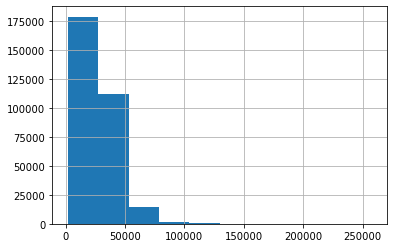

AMT_GOODS_PRICE 	 0.09040327012692229


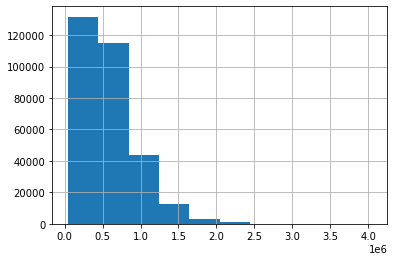

NAME_TYPE_SUITE 	 0.42014757195677555


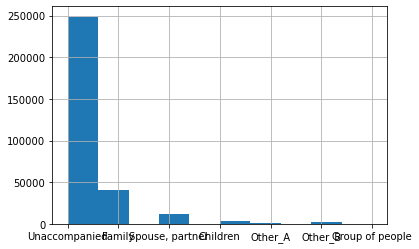

CNT_FAM_MEMBERS 	 0.0006503832383231819


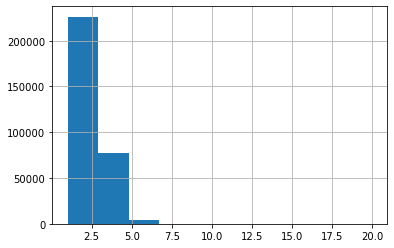

EXT_SOURCE_2 	 0.21462646864665005


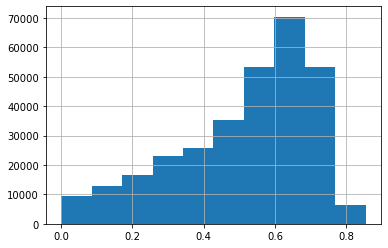

OBS_30_CNT_SOCIAL_CIRCLE 	 0.3320206431639844


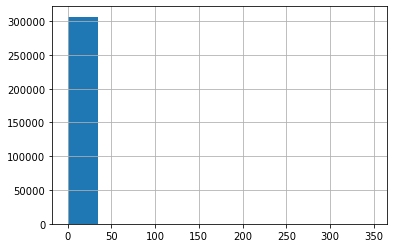

DEF_30_CNT_SOCIAL_CIRCLE 	 0.3320206431639844


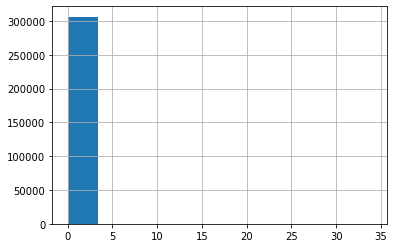

OBS_60_CNT_SOCIAL_CIRCLE 	 0.3320206431639844


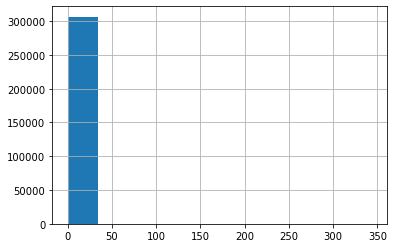

DEF_60_CNT_SOCIAL_CIRCLE 	 0.3320206431639844


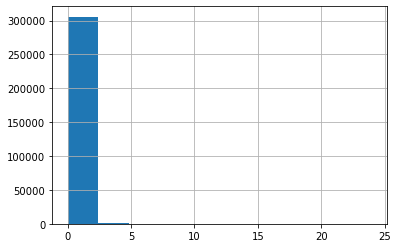

DAYS_LAST_PHONE_CHANGE 	 0.00032519161916159093


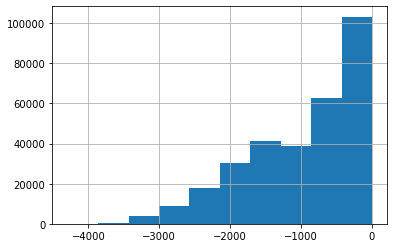

In [18]:
x = df.isnull().sum()
ind = list(x.index)
cnt = 0
for i in range(len(x)):
    y = x[i]/len(df) *100 
    if y>0 and y<=5:
        cnt += 1
        print(ind[i], "\t", y)
        df[ind[i]].hist()
        plt.show()

In [19]:
mode_impute = ['NAME_TYPE_SUITE' ,'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE' , 'DEF_30_CNT_SOCIAL_CIRCLE', 
               'OBS_60_CNT_SOCIAL_CIRCLE' , 'DEF_60_CNT_SOCIAL_CIRCLE']

median_impute = ['AMT_ANNUITY' ,'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE']

In [20]:
for i in range(len(mode_impute)):
    df[mode_impute[i]].fillna(df[mode_impute[i]].mode()[0], inplace=True)
    
for j in range(len(median_impute)):
    df[median_impute[j]].fillna(df[median_impute[j]].median(), inplace=True)

### Seperating continuous and categorical variables

In [21]:
all_col = df.columns
non_null = []
null = []
for i in list(all_col):
    if df[i].isnull().sum() == 0:
        non_null.append(i)
    else:
        null.append(i)


In [22]:
null_continuous = []
null_categorical = []
for i in range(0, len(null)):
    if len(df[null[i]].unique()) >= 26:
        null_continuous.append(null[i])
    else:
        null_categorical.append(null[i])


In [23]:
null_categorical.append(null_continuous.pop())  ## POP...  RUN ONLY ONCE

In [24]:
non_null_continuous = []
non_null_categorical = []
for i in range(0, len(non_null)):
    if len(df[non_null[i]].unique()) >= 50:
        non_null_continuous.append(non_null[i])
    else:
        non_null_categorical.append(non_null[i])

In [25]:
non_null_continuous.remove('SK_ID_CURR')
non_null_continuous.remove('ORGANIZATION_TYPE')
non_null_categorical.append('ORGANIZATION_TYPE')

In [26]:
continuous = non_null_continuous + null_continuous
categorical = non_null_categorical + null_categorical

### KNN Imputation for missing values of continuous variables

In [27]:
#from sklearn.preprocessing import StandardScaler

In [28]:
# df_non_null_cont = df.loc[:, non_null_continuous]
# df_non_null_cont

In [29]:
# st = StandardScaler()
# scaled_df = st.fit_transform(df_non_null_cont)

In [30]:
# scaled_df = pd.DataFrame(scaled_df, columns= non_null_continuous)

In [31]:
#from sklearn.impute import KNNImputer

In [32]:
#col = list(scaled_df.columns)

In [33]:
# imputer = KNNImputer(n_neighbors=3)
# After_imputation = imputer.fit_transform(scaled_df)
# a = pd.DataFrame(After_imputation, columns=col)
# a

### Reading KNN imputed file and joining with the dataframe

In [34]:
df_continuous = pd.read_csv('Imputed_Results.csv')

In [35]:
df[null_continuous] = df_continuous[null_continuous]

### Dropping the insignificane categorical variables based on Cramer's V Rule

In [36]:
categorical_insignificance = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                             'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL','LIVE_REGION_NOT_WORK_REGION', ]

In [37]:
for i in categorical_insignificance:
    if i in categorical:
        categorical.remove(i)

### Imputing the remining NULL categorical columns with conditional mode

In [38]:
for i in null_categorical:
    mode_0 = (df[df.TARGET == 0].loc[:, [i]].mode())
    mode_1 = (df[df.TARGET == 1].loc[:, [i]].mode())
    
    mode_0 = mode_0.loc[:, i][0]
    mode_1 = mode_1.loc[:, i][0]
    
    
    df[i][df.TARGET == 0] = df[i][df.TARGET == 0].fillna(mode_0)
    df[i][df.TARGET == 1] = df[i][df.TARGET == 1].fillna(mode_1)

In [39]:
continuos = null_continuous + non_null_continuous

In [40]:
categorical = null_categorical + non_null_categorical

In [41]:
#df.to_csv('FINAL.csv', index=False)

### Finding the IV

In [42]:
from monotonic_binning.monotonic_woe_binning import Binning

In [43]:
col = continuos

In [44]:
col.append('TARGET')

In [45]:
# iv = []
# continuos_insignificance = [ ]
# for i in col:
#     var = i
#     y_var = 'TARGET'
    
#     if var != y_var:
#         bin_object = Binning(y_var, n_threshold=50, y_threshold=10, p_threshold=0.35, sign=False)
#         bin_object.fit(df[[y_var, var]])
#         iv = round(np.sum(bin_object.woe_summary['IV_components']),4)
#         print(var, ':', iv )
#         if iv < 0.03:
#             continuos_insignificance.append(var)
#         #j = 'WOE_' + i
#         #plt.plot(bin_object.woe_summary[j])
#         #plt.show()
        

In [46]:
continuos_insignificance = ['EXT_SOURCE_1','EXT_SOURCE_3', 'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
                            'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','LANDAREA_AVG','LIVINGAREA_AVG','NONLIVINGAREA_AVG',
                            'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE',
                            'ENTRANCES_MODE','FLOORSMAX_MODE','LANDAREA_MODE','LIVINGAREA_MODE','NONLIVINGAREA_MODE',
                            'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','ELEVATORS_MEDI',
                            'ENTRANCES_MEDI','FLOORSMAX_MEDI','LANDAREA_MEDI','LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI',
                            'TOTALAREA_MODE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                            'REGION_POPULATION_RELATIVE','EXT_SOURCE_2']

In [47]:
df = df.drop(continuos_insignificance, axis=1)

In [48]:
categorical.remove('TARGET')

In [49]:
categorical_dummies = []
categorical_non_dummies = []
for i in categorical:
    if df[i].dtype == object:
        categorical_dummies.append(i)
        
for i in categorical:
    if i not in categorical_dummies:
        categorical_non_dummies.append(i)

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, f1_score, recall_score, accuracy_score, confusion_matrix

In [52]:
X = df.drop(['TARGET', 'SK_ID_CURR'], axis = 1)
y = df.TARGET

In [58]:
X = pd.get_dummies(X, columns=categorical_dummies, drop_first=True)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
Xb_train, yb_train = sm.fit_resample(X_train, y_train)

In [61]:
logreg = LogisticRegression()
logreg.fit(Xb_train, yb_train)
y_train_pred = logreg.predict(Xb_train)

In [62]:
#y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(accuracy_score(yb_train, y_train_pred)*100))

Accuracy of logistic regression classifier on training set: 55.33


In [63]:
cm = confusion_matrix(yb_train, y_train_pred)
print(cm)

[[121879  90097]
 [ 99278 112698]]


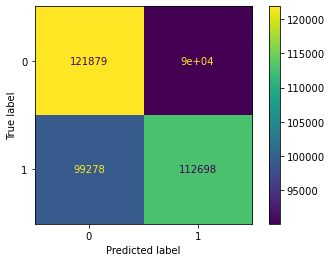

In [64]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot();
plt.show()

In [65]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

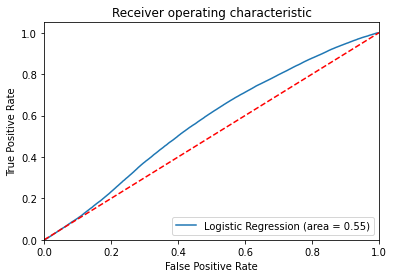

In [66]:
logit_roc_auc = roc_auc_score(yb_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(yb_train, logreg.predict_proba(Xb_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [67]:
print(precision_score(yb_train, y_train_pred))
print(recall_score(yb_train, y_train_pred))
print(f1_score(yb_train, y_train_pred))

0.5557237604477427
0.5316545269275768
0.5434227561714777


In [68]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)*100))

Accuracy of logistic regression classifier on test set: 55.60


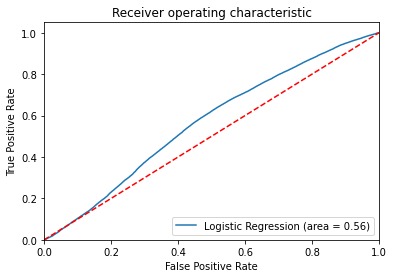

In [69]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [70]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5584858827179646
0.5345778532032245
0.5462704038499057


In [71]:
###   df[X.OBS_60_CNT_SOCIAL_CIRCLE >=300]   ---------------          outlier

### Combing the other csv files

In [72]:
# iv = []
# continuos_insignificance = [ ]
# for i in col:
#     var = i
#     y_var = 'TARGET'
    
#     if var != y_var:
#         bin_object = Binning(y_var, n_threshold=50, y_threshold=10, p_threshold=0.35, sign=False)
#         bin_object.fit(df[[y_var, var]])
#         iv = round(np.sum(bin_object.woe_summary['IV_components']),4)
#         print(var, ':', iv )
#         if iv < 0.03:
#             continuos_insignificance.append(var)
#         #j = 'WOE_' + i
#         #plt.plot(bin_object.woe_summary[j])
#         #plt.show()
        

In [73]:
continuos_insignificance = ['SK_ID_PREV','AMT_APPLICATION','AMT_DOWN_PAYMENT','NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT',
                            'RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','SELLERPLACE_AREA','CNT_PAYMENT',
                            'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL',
                            'NUM_INSTALMENT_VERSION','NUM_INSTALMENT_NUMBER','AMT_INSTALMENT','AMT_PAYMENT','MONTHS_BALANCE',
                            'CNT_INSTALMENT','CNT_INSTALMENT_FUTURE','SK_DPD','AMT_CREDIT_LIMIT_ACTUAL',
                            'AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT','AMT_PAYMENT_CURRENT',
                            'CNT_DRAWINGS_OTHER_CURRENT','SK_ID_BUREAU','CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG',
                            'AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_OVERDUE']

In [74]:
new_df = pd.read_csv('TRAIN.csv')

In [75]:
f = pd.read_csv('application_train.csv')

In [76]:
keep = list(df.columns)

In [77]:
f_col = list(f.columns)

In [78]:
delete_col = []

In [79]:
for i in f_col:
    if i not in keep:
        delete_col.append(i)

In [80]:
delete_col.remove('FONDKAPREMONT_MODE')

In [81]:
new_df.drop(delete_col, axis=1, inplace=True)

In [82]:
new_df.drop('index', axis=1, inplace=True)

In [83]:
new_df

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_7,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,SK_ID_PREV,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE
0,100002,0.0,-9461.0,-637.0,-3648.0,-2120.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1038818.0,179055.00,0.00,1.0,0.000000,NaN,NaN,-606.0,500.0,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,-10.00,24.000000,15.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6158905.5,-1042.5,0.0,-424.5,-939.0,40.500,0.0,54130.50,0.000,0.0,0.0,-402.5
1,100003,0.0,-16765.0,-1188.0,-1186.0,-291.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,337500.00,3442.50,1.0,0.050030,NaN,NaN,-828.0,200.0,12.0,365243.0,-797.0,-647.0,-647.0,-639.0,1.0,1.000000,4.000000,-722.000000,-733.166667,64518.990000,64518.990000,-24.50,11.375000,6.500000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5885878.5,-1205.5,0.0,-480.0,-621.0,0.000,0.0,92576.25,0.000,0.0,0.0,-545.0
2,100004,0.0,-19046.0,-225.0,-4260.0,-2531.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,24282.00,4860.00,1.0,0.212008,NaN,NaN,-815.0,30.0,4.0,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000,-25.50,3.750000,2.250000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6829133.5,-867.0,0.0,-488.5,-532.5,0.000,0.0,94518.90,0.000,0.0,0.0,-532.0
3,100006,0.0,-19005.0,-3039.0,-9833.0,-2437.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2078043.0,270000.00,34840.17,1.0,0.163412,NaN,NaN,-181.0,-1.0,15.0,365243.0,-216.0,654.0,182546.0,182550.0,0.0,1.200000,3.000000,-151.000000,-174.000000,29027.520000,29027.520000,-5.50,12.000000,7.500000,0.000000,0.000000,0.0,270000.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0

In [84]:
col = list(df.columns)

In [85]:
new_df[col] = df[col]

In [86]:
imputation = new_df.copy()

In [87]:
imputation.drop(col, axis=1, inplace=True)

In [88]:
imputation['TARGET'] = new_df.TARGET

In [89]:
for i in imputation.columns:
    if imputation[i].isnull().sum() != 0:
        median_0 = (imputation[imputation.TARGET == 0].loc[:, [i]].median())[0]
        median_1 = (imputation[imputation.TARGET == 1].loc[:, [i]].median())[0]
        
        imputation[i][imputation.TARGET == 0] = imputation[i][imputation.TARGET == 0].fillna(median_0)
        imputation[i][imputation.TARGET == 1] = imputation[i][imputation.TARGET == 1].fillna(median_1)

In [90]:
col = list(imputation.columns)

In [91]:
new_df[col] = imputation[col]

In [92]:
new_df.drop(['SK_ID_BUREAU', 'SK_ID_CURR', 'SK_ID_PREV'], axis=1, inplace=True)

In [93]:
continuos_insignificance.remove('SK_ID_PREV')
continuos_insignificance.remove('SK_ID_BUREAU')

In [94]:
new_df.drop(continuos_insignificance, axis=1, inplace=True)

In [95]:
X = new_df.drop('TARGET', axis = 1)
y = df.TARGET

In [96]:
X = pd.get_dummies(X, columns=categorical_dummies, drop_first=True)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [98]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
Xb_train, yb_train = sm.fit_resample(X_train, y_train)

In [99]:
logreg = LogisticRegression()
logreg.fit(Xb_train, yb_train)
y_train_pred = logreg.predict(Xb_train)

In [100]:
#y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(accuracy_score(yb_train, y_train_pred)*100))

Accuracy of logistic regression classifier on training set: 89.43


In [101]:
cm = confusion_matrix(yb_train, y_train_pred)
print(cm)

[[197960  14094]
 [ 30728 181326]]


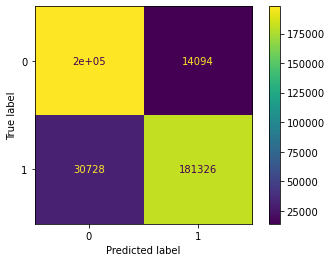

In [102]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot();
plt.show()

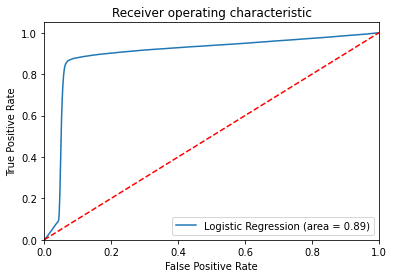

In [103]:
logit_roc_auc = roc_auc_score(yb_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(yb_train, logreg.predict_proba(Xb_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [104]:
print(precision_score(yb_train, y_train_pred))
print(recall_score(yb_train, y_train_pred))
print(f1_score(yb_train, y_train_pred))

0.9278784157199877
0.8550935139162666
0.890000343580204


In [105]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)*100))

Accuracy of logistic regression classifier on test set: 89.55


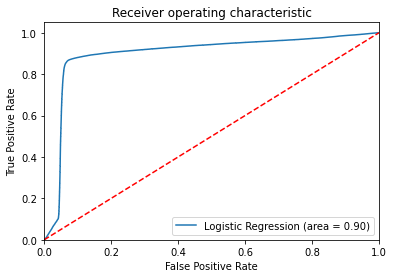

In [106]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [107]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9282342121397915
0.8573734284743459
0.8913977861516722
